In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from PIL import Image
%matplotlib inline 


In [6]:
#import the image
img=cv2.imread('/content/gdrive/MyDrive/DPCV_images/trump_exp3.jpg')
print(img.shape)

(309, 549, 3)


In [ ]:
print(img.dtype)

uint8


In [42]:
class Augmentation:
  def __init__(self,img,Affine=False):
    self.img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    self.rows=self.img.shape[0]
    self.cols=self.img.shape[1]
    self.output=np.zeros((self.rows,self.cols), dtype=np.uint8)
    self.affine=Affine


  def translation(self):
    M = np.float32([[1,0,100],[0,1,50]])
    self.output = cv2.warpAffine(self.img,M,(self.cols+50,self.rows+100))


  def euclidean_transformation(self):
    '''getRotationMatrix2D	(	Point2f 	center,
double 	angle,
double 	scale 
)	'''
    M = cv2.getRotationMatrix2D(((self.cols-1)/2.0,(self.rows-1)/2.0),60,1)
    self.output=cv2.warpAffine(self.img,M,(self.cols,self.rows))

  def affine_transform(self):
    '''n affine transformation, all parallel lines in the original image will still be parallel in the output image.
     To find the transformation matrix, we need three points from the input image and their corresponding locations in the output image.'''
    pts1 = np.float32([[0,0],[549,0],[309,549]])
    pts2 = np.float32([[0,154],[275,0],[294,549]])
    M = cv2.getAffineTransform(pts1,pts2)
    cols,rows=M.shape
    self.output= cv2.warpAffine(img,M,(self.cols,self.rows))
    
  def projective_transform(self):
    '''combination of affine warp and projective warps
    Properties:
    ->lines remain lines
    ->orgin does not necessarly map origins
    ratios are not preserved
     '''
    pts1 = np.float32([[0,0],[549,0],[309,549],[0,309]])
    pts2 = np.float32([[0,78],[549,0],[309,549],[0,232]])
      
    # Apply Perspective Transform Algorithm
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    self.output = cv2.warpPerspective(self.img, matrix, (self.cols, self.rows))


  def similar_transform(self):
    ''', Similarity transform is not just translation. 
    Usually it means scale + rotation + translation. Its difference from Affine transform is absence of shear.
    https://answers.opencv.org/question/19929/how-to-achieve-similarity-transform/
    What is a Similarity Transformation?
Geometry transformations are movements of two-dimensional shapes in two dimensions, 
or within their plane. Like restricted game pieces on a game board, you can move two-dimensional shapes in only three ways:

Rotation -- Shapes are rotated or turned around an axis
Reflection -- Shapes are flipped across an imaginary line to make mirror images
Translation -- Shapes are slid across the plane
(In this function i only considered rotation and translation'''
    M = np.float32([[1,0,100],[0,1,50]])
    translation= cv2.warpAffine(self.img,M,(self.cols+50,self.rows+100))
    M2= cv2.getRotationMatrix2D(((self.cols-1)/2.0,(self.rows-1)/2.0),-60,1)
    self.output=cv2.warpAffine(self.img, M2, (self.cols+100, self.rows+200))



  def display(self):
    plt.subplot(121),plt.imshow(self.img,cmap='gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    if self.affine==True:
      plt.subplot(122),plt.imshow(self.output,cmap='gray')
      print('affine')
    else:
      plt.subplot(122),plt.imshow(self.output,cmap='gray')
    plt.title('transformed image'), plt.xticks([]), plt.yticks([])
    plt.show()  
  





In [14]:
aug=Augmentation(img)

affine


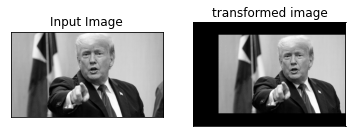

In [31]:

aug.translation()
aug.display()

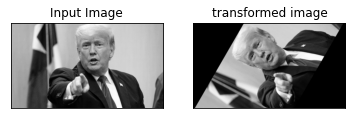

In [ ]:
aug.euclidean_transformation()
aug.display()

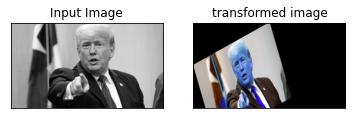

In [45]:
aug=Augmentation(img)
aug.affine_transform()
aug.display()

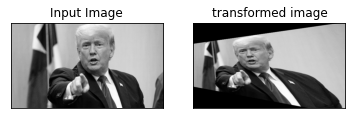

In [18]:
aug=Augmentation(img)
aug.projective_transform()
aug.display()

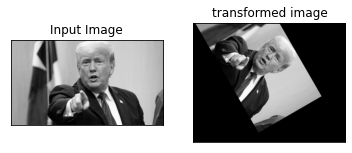

In [44]:
aug=Augmentation(img)
aug.similar_transform()
aug.display()